# Homework 04: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'tengdann'

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_ca = pd.read_csv('data/hw4_data/youtube/CAvideos.csv')
df_de = pd.read_csv('data/hw4_data/youtube/DEvideos.csv')
df_fr = pd.read_csv('data/hw4_data/youtube/FRvideos.csv')
df_gb = pd.read_csv('data/hw4_data/youtube/GBvideos.csv')
df_in = pd.read_csv('data/hw4_data/youtube/INvideos.csv')
# df_jp = pd.read_csv('data/hw4_data/youtube/JPvideos.csv')
# df_kr = pd.read_csv('data/hw4_data/youtube/KRvideos.csv')
# df_mx = pd.read_csv('data/hw4_data/youtube/MXvideos.csv')
# df_ru = pd.read_csv('data/hw4_data/youtube/RUvideos.csv')
df_us = pd.read_csv('data/hw4_data/youtube/USvideos.csv')

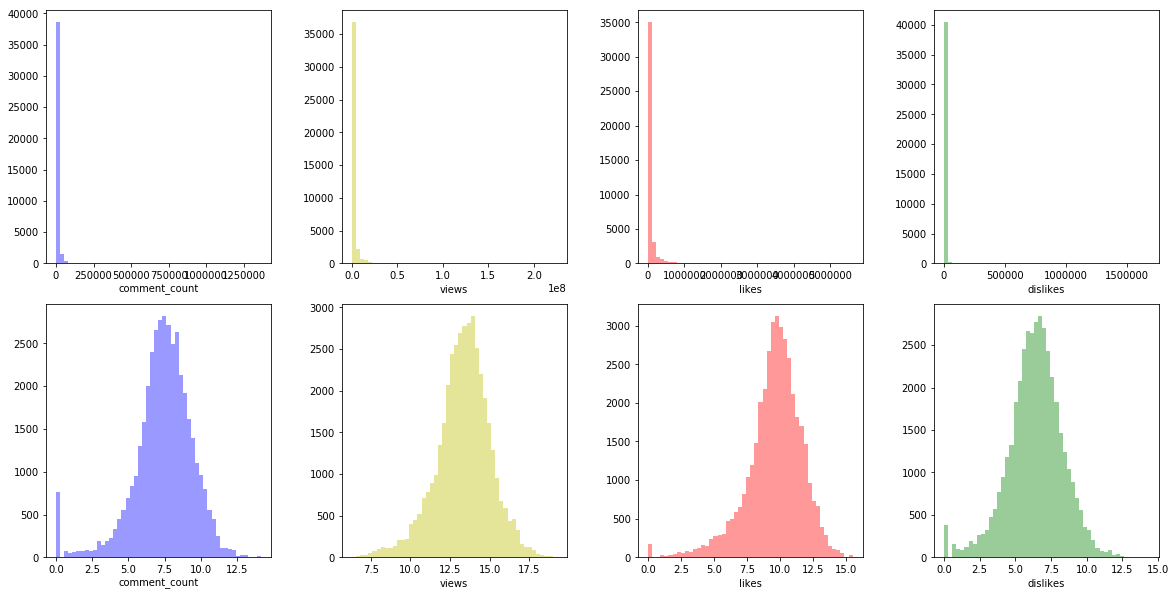

In [4]:
df_us_clean = df_us[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_ca_clean = df_ca[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_de_clean = df_de[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_fr_clean = df_fr[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_gb_clean = df_gb[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
fig, axs = plt.subplots(2, 4, figsize = (16,8))
plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 2)

sns.distplot(df_us_clean.comment_count, color = 'b', kde = False, ax = axs[0,0])
sns.distplot(df_us_clean.views, color = 'y', kde = False, ax = axs[0,1])
sns.distplot(df_us_clean.likes, color = 'r', kde = False, ax = axs[0,2])
sns.distplot(df_us_clean.dislikes, color = 'g', kde = False, ax = axs[0,3])

df_us_clean_log = df_us_clean.copy()
df_us_clean_log[['comment_count', 'views', 'likes', 'dislikes']] = np.log(df_us_clean_log[['comment_count', 'views', 'likes', 'dislikes']] + 1) #Need + 1 for 0 values

sns.distplot(df_us_clean_log.comment_count, color = 'b', kde = False, ax = axs[1,0])
sns.distplot(df_us_clean_log.views, color = 'y', kde = False, ax = axs[1,1])
sns.distplot(df_us_clean_log.likes, color = 'r', kde = False, ax = axs[1,2])
sns.distplot(df_us_clean_log.dislikes, color = 'g', kde = False, ax = axs[1,3])

The non-transformed histograms appear to be power distributions.

The log-transformed histograms now appear to have a normal distribution.

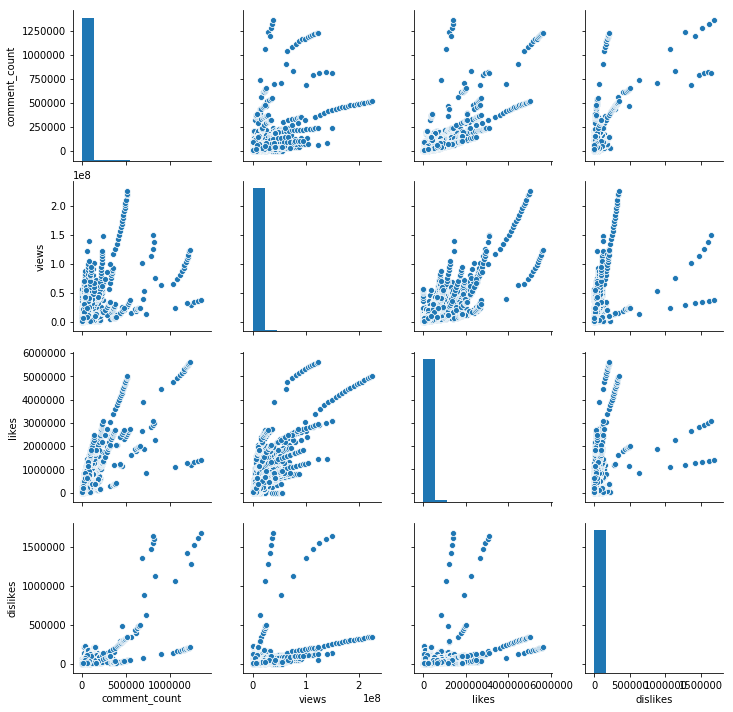

In [6]:
sns.pairplot(df_us_clean)

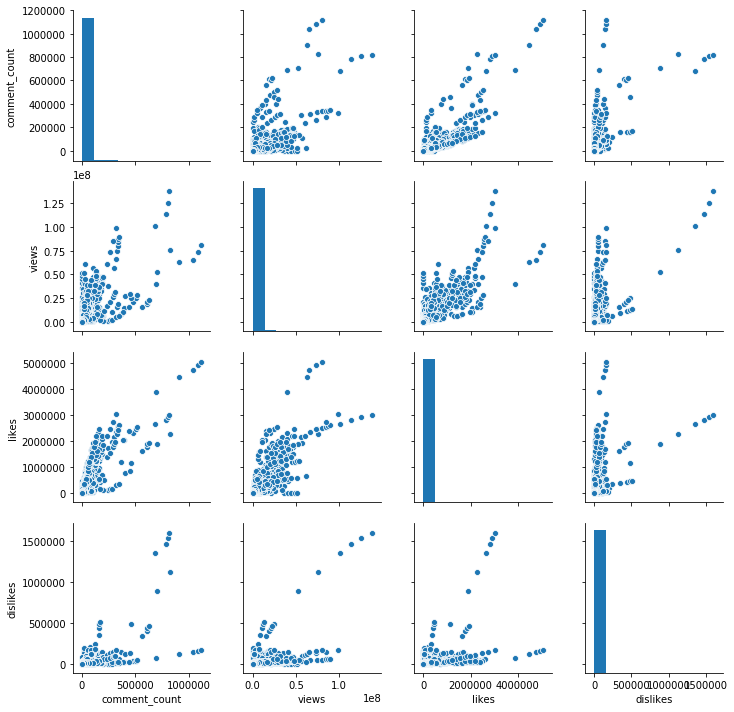

In [5]:
sns.pairplot(df_ca_clean)

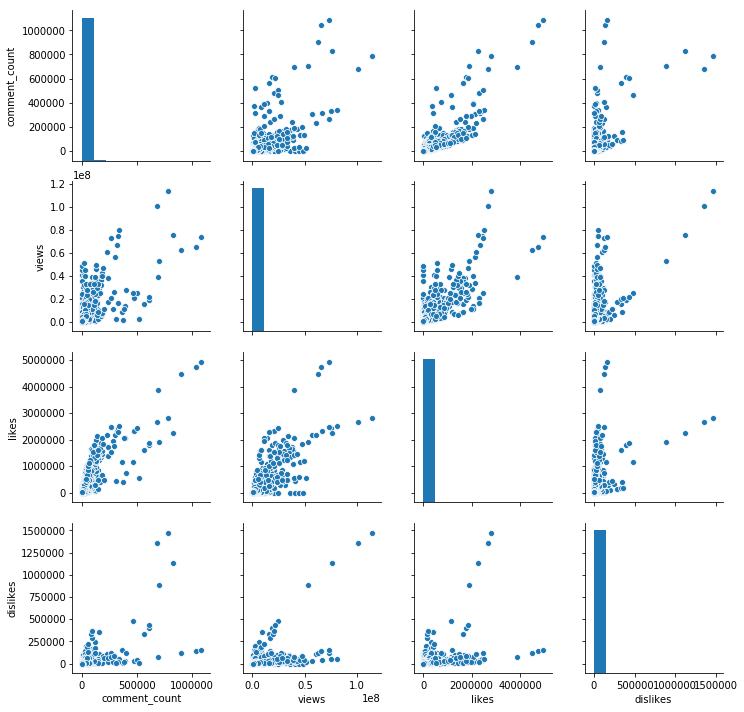

In [6]:
sns.pairplot(df_de_clean)

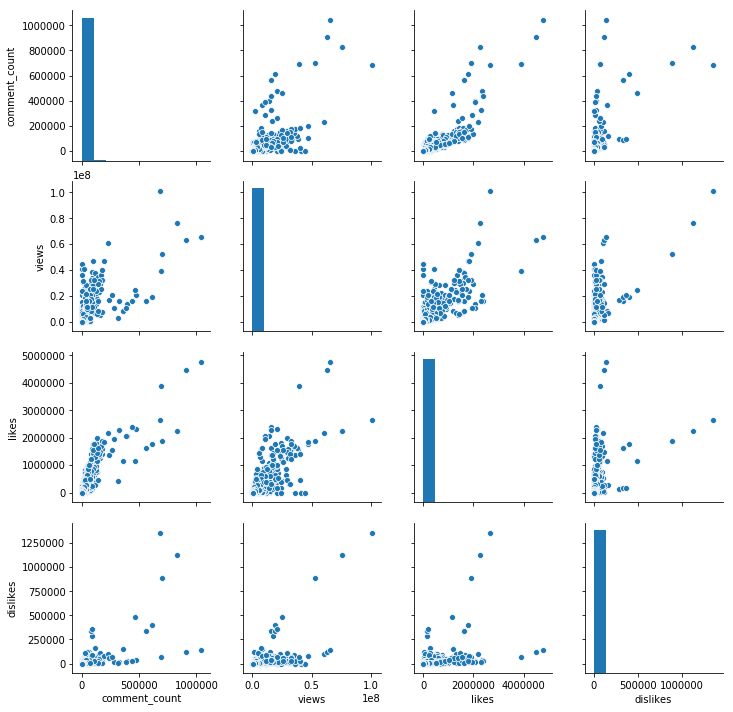

In [7]:
sns.pairplot(df_fr_clean)

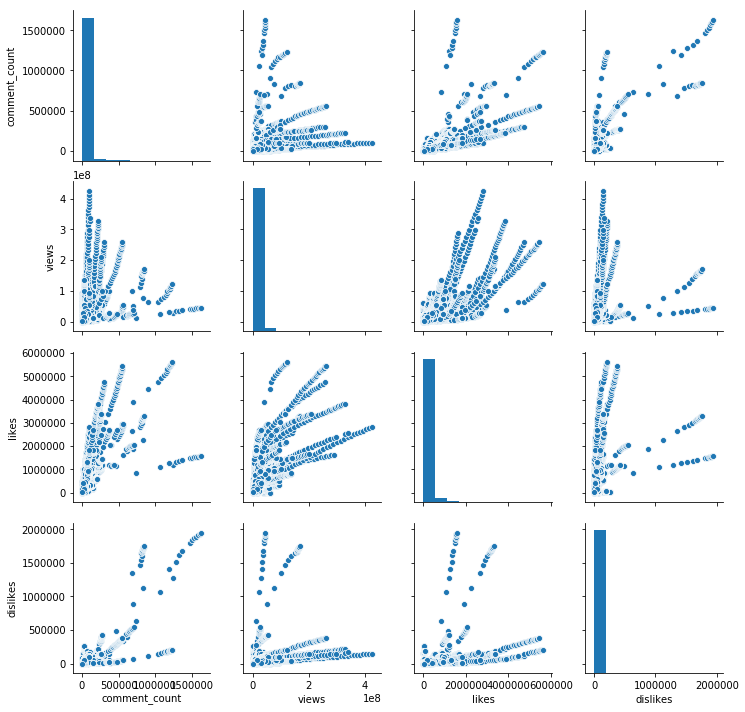

In [8]:
sns.pairplot(df_gb_clean)

### Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

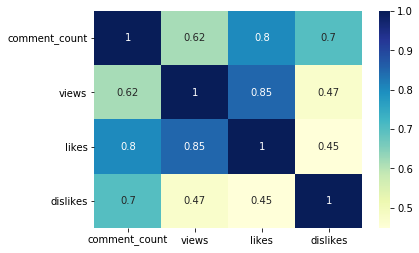

In [7]:
df_us_corr = df_us_clean.corr()
sns.heatmap(df_us_corr, annot = True, cmap = 'YlGnBu')

(Use this space to explain your answers)

### Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice
* select two variables (remember to filter for the region of your choice)
* use the JointGrid approach from our in-class session to visualize the relationship between the variables
* use `statsmodels` to create a regression model
* explain the how the results of the regression analysis help you understand the plot (and vice versa)

C:\Users\mrasianman3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


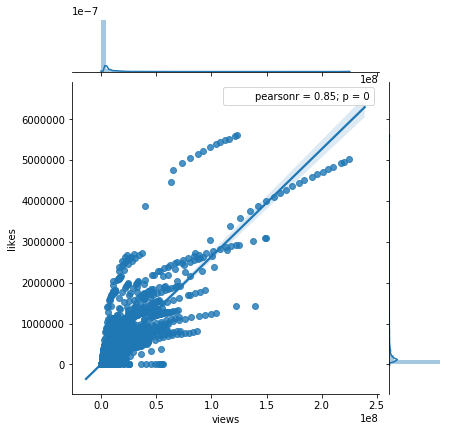

In [15]:
plot = sns.JointGrid(data = df_us_clean, x = 'views', y = 'likes')
plot = plot.plot(sns.regplot, sns.distplot)
plot = plot.annotate(stats.stats.pearsonr)

In [18]:
views_likes_model = smf.ols('likes ~ views', data = df_us_clean).fit()
views_likes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:39:46   Log-Likelihood:            -5.3731e+05
No. Observations:               40949   AIC:                         1.075e+06
Df Residuals:                   40947   BIC:                         1.075e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e+04    627.053     19.473      0.000     1.1e+04    1.34e+04
views          0.0263   8.08e-05    325.376      0.000       0.026       0.026
==============================================================================
Omnibus:                    56358.973   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44741630.414
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                     164.224   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(Use this space to explain your answers)

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [20]:
pokemon = pd.read_csv('data/hw4_data/Pokemon.csv', index_col = 0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

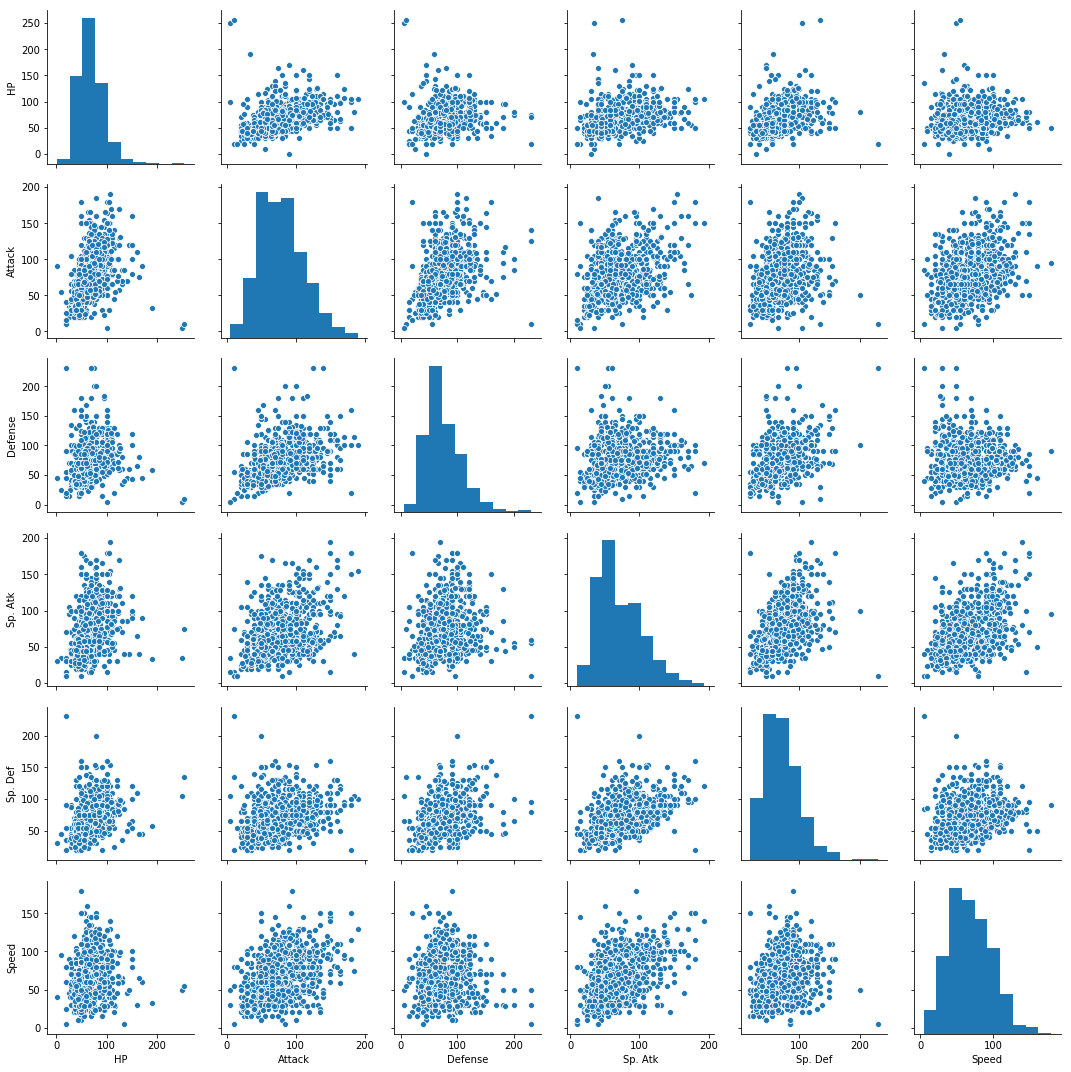

In [23]:
plots = sns.pairplot(pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

(Use this space to explain your answers)

### Q5. For 15 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

In [2]:
# put your code here

(Use this space to explain your answers)

### Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [ ]:
# put your code here

(Use this space to explain your answers)